# Special Lecture for _Black Holes and Gravitational Waves_ on Inspiral-Merger-Ringdown (IMR) waveforms

In this lecture (and the exercise session), we explore the full graviational-wave (GW) emission from a compact binary coalescence (CBC), beyond what was covered in [the lecture notes](https://github.com/MvdMeent/BlackHolesandGravitationalWaves/blob/main/Lecture_Notes_BHs_GWs.pdf) in Chapter 5, essentially continuing Section 5.3.

In [1]:
# This is going to be an interactive session, start executing this cell to install all necessary software packages,
# while we continue with the lecture
!pip install lalsuite
!pip install pycbc
!pip install qnm
!pip install pyRing

## Waveform phenomenology and binary dynamics

The coalescence of a compact binary system consists of three stages, namely the _inspiral_, _merger_ (sometimes late inspiral + merger), and _ringdown_. The GW emitted from each of the three stages has different characteristics, allowing us to model/approximate the gravitational waveform with different schemes, as there is still no analytical solution to the relativistic two-body problem throughout all three of the stages.

Here we will be focusing on binary black hole (BBH) mergers.

<center><img src="inspiral-merger-ringdown.png" width="800" height="400"></center>
Figure credit: Cattorini and Giacomazzo (2024)

### Inspiral
During the inspiral, the compact objects are (relatively) far away from each other. The GW emitted from the system "hardens" the orbit (that is, the orbit shrinks), as GW carries (binding) energy away from the system.

This is a "runaway" process, where the two objects get closer and closer, emitting more GW at higher and higher frequencies (hence the name "chirping waveform", akin to birds chirping with increasing pitches).

At this stage, the mutual gravity is still "not strong enough" to warrant a full general relativistic treatment. Instead, it is sufficient to use corrections to the Newtonian gravity theory to model the dynamics of the binary system. One such technique is known as the **post-Newtonian Approximation** (PN). With the PN approximation scheme, analytical solutions to the two-body motion can still be written, allowing us to also write down analytical waveforms.

The quadrupolar formula in Eqs. 5.2.35 and 5.2.36, together with Eqs. 5.2.31 and 5.2.37 is a good example, where only the _leading order correction_ is included. Later in the class, we will see when the leading order correction becomes insufficient/inaccurate.

### Merger

When the two compact objects get close enough such that the mutal gravity is strong, general relativistic effects need to be considered fully in order to describe their dynamics properly. The two objects will inevitably collide and merge together. This stage is thus referred to as the merger.

In the equal mass-ratio limit, that is when the two objects have roughly the same mass, **numerical relativity** (NR) is usually employed. This means that the non-linear Einstein field equations are solved numerically, usually with supercomputers, as this is computationally intensive.

While the theory of general relativity has been around for about 100+ years now, it was not until 2005 where a breakthrough was made in the NR community that allows for numerical simulations of binary black hole mergers for more than 1 complete cycle/orbit right before the merger.

### Ringdown

After the violent collision, a black hole (BH) is formed as the remnant. However, this new black hole has been highly excited from the merger.

As you have learned in Chapter 3, the BH will gradually relax to a stationary state by emitting GWs with certain characteristic oscillation modes (frequencies) called _quasi-normal modes_ (QNMs) [cf Section 3.6 of the lecture notes]. A superposition of these QNMs will be an excellent description of the gravitational waveform some time later after the merger (or the peak of the waveform, so to speak).

This is where the **black hole perturbation theory** (BHPT) comes in, where one can compute the numerical values of these characteristic QNM frequencies. Later in the class, we will do exactly that and see that they are indeed a good match to the waveform.

## Generating a full IMR waveform

The construction of a full IMR waveform is a highly non-trivial task, and in fact, it is one of the main and hot topics in the GW research community. We need these models for the IMR waveforms in order to search for them in the noisy LIGO-Virgo-KAGRA (LVK) data, as well as to characterize the sources of those GW signals. In fact, these will be covered later by Jose (see the timetable).

Here, we will be using a number of codes where those waveform models (also referred to as "waveform approximants") are implemented, namely `LALSuite` and `PyCBC`.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# Plotting configuration
%matplotlib inline
%config inlinebackend.figure_format = 'retina'
plt.rcParams.update(
    {
        'text.usetex': False,
        'axes.titlesize' : 14,
        'axes.labelsize': 16,
        'xtick.labelsize' : 16,
        'ytick.labelsize' : 16,
        'legend.fontsize': 14,
    }
)

In [3]:
# Importing packages
import lal
import pycbc.waveform

/var/folders/fw/hyqwx1t92114dfvdqzw6fglw0000gn/T/ipykernel_77528/3797680383.py:2: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


lal.MSUN_SI != Msun


Let us try to generate the complete IMR waveform for a $30M_{\odot}-30M_{\odot}$ non-rotating BBH system. In particular, we will be using an approximant codenamed `IMRPhenomTPHM` [Phys.Rev.D 105 (2022) 8, 084040].

You are also welcomed to try using different models (use `pycbc.waveform.td_approximants()` to see what models are available to you).

In [4]:
# Defining the parameters
mass1 = 30 # Msun
mass2 = 30 # Msun
distance = 100 # Mpc
inc = 0 # rad

In [5]:
hp, hc = pycbc.waveform.get_td_waveform(
    approximant="IMRPhenomTPHM",
    mass1=mass1,
    mass2=mass2,
    delta_t=1./16384,
    f_lower=10,
    distance=distance,
    coa_phase=0,
    inclination=inc,
    mode_array=[[2,2],[2,-2]],
)

That is it! Now, let us try to plot both the plus $h_{+}$ and the cross $h_{\times}$ polarization:

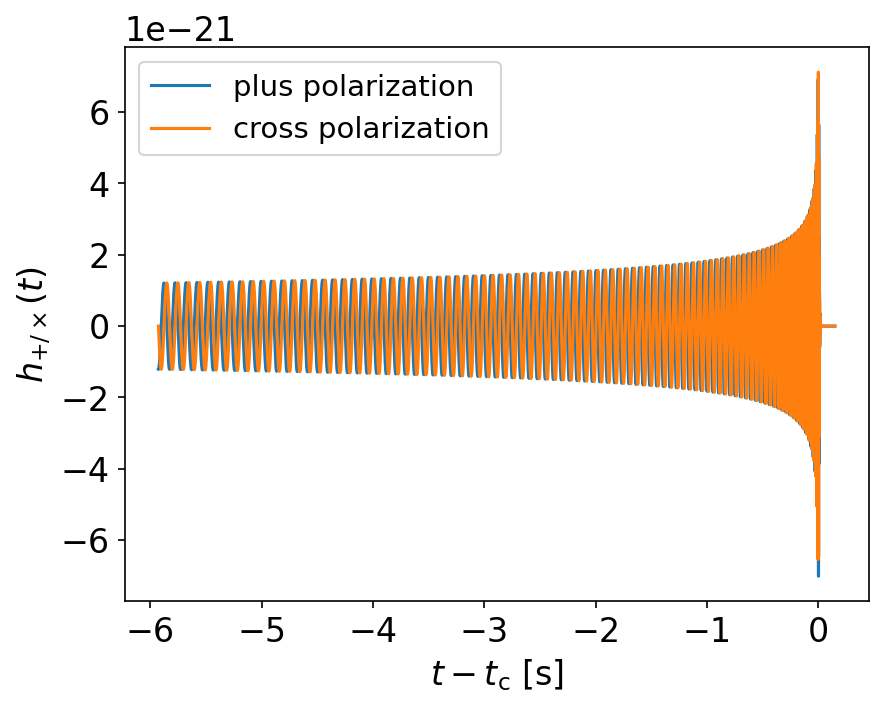

In [6]:
fig = plt.figure(dpi=150)
ax = fig.gca()
ax.plot(hp.sample_times, hp, label="plus polarization")
ax.plot(hc.sample_times, hc, label="cross polarization")
ax.set_xlabel(r"$t - t_{\rm c}$" + " [s]")
ax.set_ylabel(r"$h_{+/\times}(t)$")
plt.legend()

Note that the plus and the cross polarizations are identical. This is because we are viewing the binary _face-on_. Also, both polarizations peak roughly at $t = t_{\rm c}$. This is by construction since $t_{\rm c}$ is the time of coalescence.

Zooming in a little bit, we see that the two polarizations are phase lagged by $1/4$ of a cycle, or $1/4 \times 2\pi$ = $\pi/2$ rad.

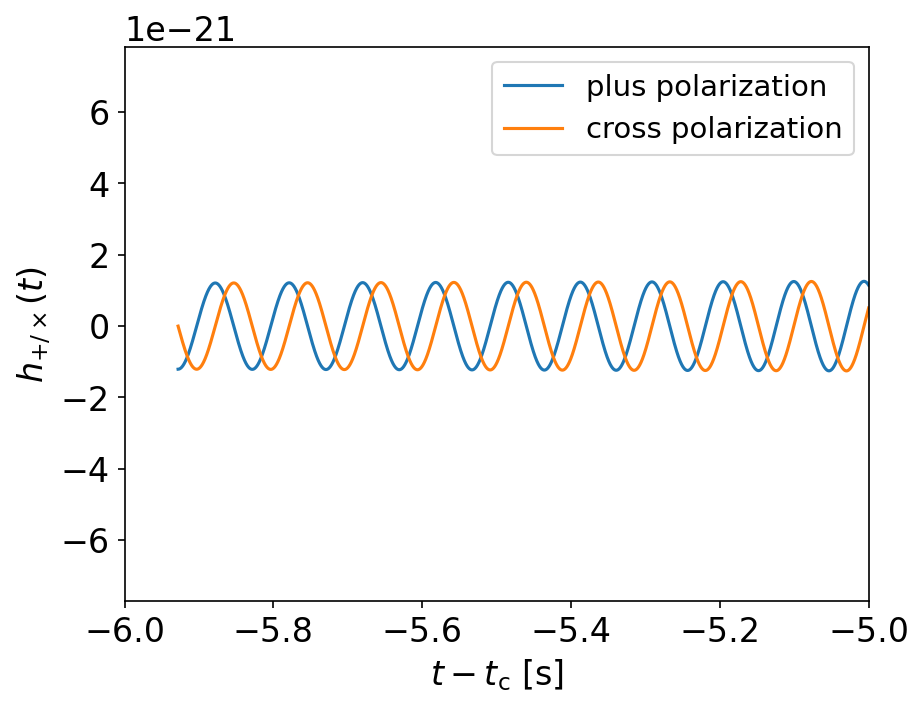

In [7]:
ax.set_xlim(-6, -5)
fig

In [8]:
# As a fun demonstration, you can actually "hear" the wave, since it is in the audible frequency range
hp.save_to_wav("hp.wav")

### Computing the instantaneous frequency $f(t)$

In order to understand the IMR waveform that we just generated, we need to compute the instantaneous frequency of the GW, $f_{\rm GW}(t)$.

This can be done if we notice that we can write $h_{+,\times}(t)$ as
$$
\begin{aligned}
h_{+}(t) & = A e^{i \Phi_{\rm GW}(t)} \; \frac{1}{2} \left( 1 + \cos^2 \theta \right) \\
h_{\times}(t) & = A e^{i \Phi_{\rm GW}(t)} \; \cos \theta
\end{aligned},
$$
where $\theta$ is the inclination and $\Phi_{\rm GW}$ is the phase of the waveform.


Since we can obtain the frequency as $f_{\rm GW}(t) = \frac{1}{2\pi} \frac{d\Phi_{\rm GW}}{dt}$, we need to first get $\Phi_{\rm GW}(t)$ from $h_{+,\times}(t)$:

In [9]:
Yc = np.cos(inc)
Yp = 0.5*(1 + Yc*Yc)
phase = np.unwrap(np.arctan2(hc/Yc, hp/Yp)) # Why do we need to do this?
f = np.gradient(phase, hp.delta_t)/(2*np.pi) # Simple finite difference method to estimate the derivative

Now let us plot what we got (basically we are recreating the lower panel of Figure 5.2 in the lecture notes)

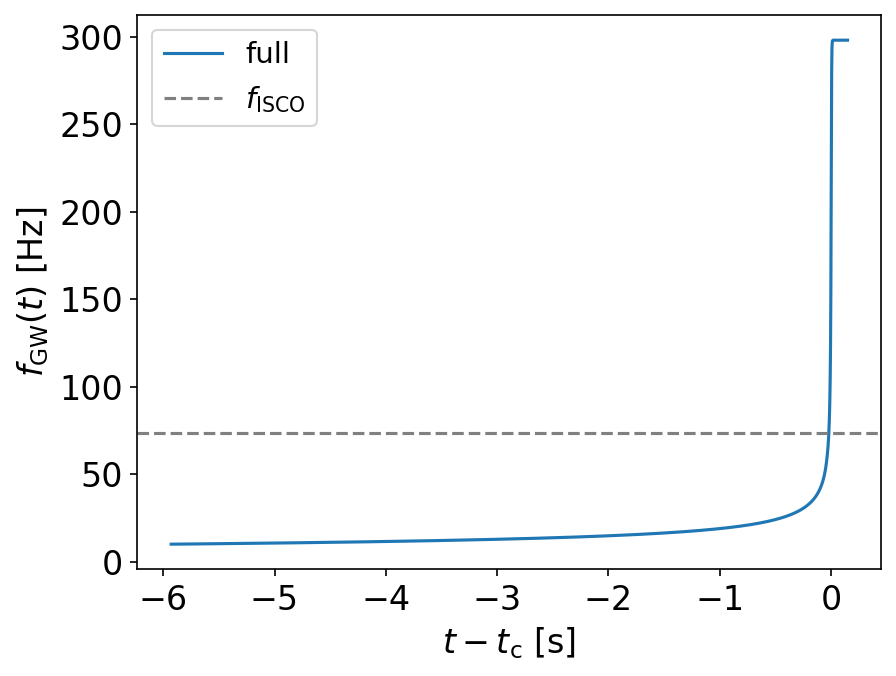

In [10]:
plt.figure(dpi=150)
ax = plt.gca()
ax.plot(hp.sample_times, f, label="full")
ax.axhline(1/(6*np.pi*np.sqrt(6)) * lal.C_SI**3/(lal.G_SI*(mass1+mass2)*lal.MSUN_SI), ls="--", c="grey", label=r"$f_{\rm ISCO}$")
ax.set_xlabel(r"$t - t_{\rm c}$" + " [s]")
ax.set_ylabel(r"$f_{\rm GW}(t)$" + " [Hz]")
plt.legend()

## Modeling the inspiral with the quadrupole formula

Here, we compare the quadrupole formula with the inspiral part of the complete IMR waveform.

But first, let us implement the quadrupole formula:

In [11]:
# Compute some more relevant quantities
mchirp = (mass1*mass2)**(3./5) / (mass1+mass2)**(1./5)
eta = (mass1*mass2)/(mass1 + mass2)**2
mchirp, eta

# Quadrupole formula for f_{\rm GW}(t)
def f_gw(t_ret, mchirp):
    return 1/(np.pi)*(5/256 * 1/t_ret)**(3./8)*(lal.G_SI*mchirp*lal.MSUN_SI/lal.C_SI**3)**(-5./8)

def Phi_gw(t_ret, mchirp, Phi_c):
    return -2*(5*lal.G_SI*mchirp*lal.MSUN_SI/lal.C_SI**3)**(-5./8)*t_ret**(5./8) + Phi_c

In [12]:
# What is the chirp mass?
mchirp, eta

(26.11651689888372, 0.25)

We are now ready to plot the gravitational waveform using the quadrupolar formula:

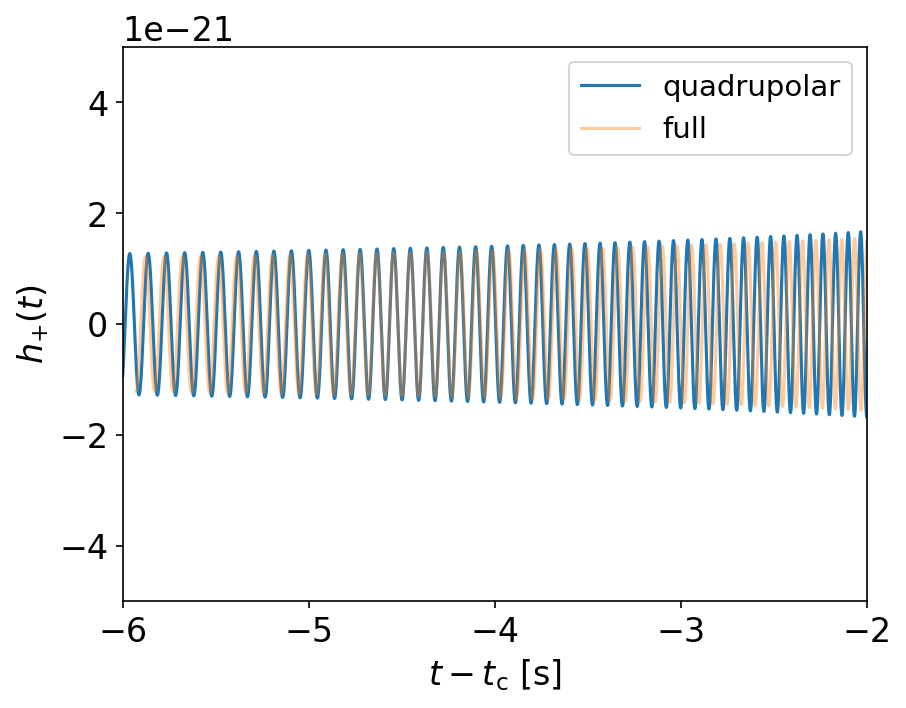

In [13]:
plt.figure(dpi=150)
ax = plt.gca()
ts = np.linspace(1e-4, 6, 50000)
hp_quad = np.array([4/(distance*1e6*lal.PC_SI) * (lal.G_SI * mchirp * lal.MSUN_SI/lal.C_SI**2)**(5./3) * (np.pi/lal.C_SI * f_gw(_t, mchirp))**(2./3) * (1 + np.cos(inc)**2)/2 * np.cos(Phi_gw(_t, mchirp, 0)) for _t in ts])
ax.plot(-ts[::-1], hp_quad[::-1], label="quadrupolar")
ax.plot(hp.sample_times, hp, label="full", alpha=0.4)
ax.set_xlabel(r"$t - t_{\rm c}$" + " [s]")
ax.set_ylabel(r"$h_{+}(t)$")
ax.set_xlim(-6, -2)
ax.set_ylim(-0.5e-20, 0.5e-20)
plt.legend()

As expected, the quadrupole formula is indeed a very good approximation early in the inspiral. But as the binary evolves, the _dephasing_ (that is, difference in the phase evolution) becomes apparent.

Let us also compare what the quadrupole formula predicts for $f_{\rm GW}(t)$:

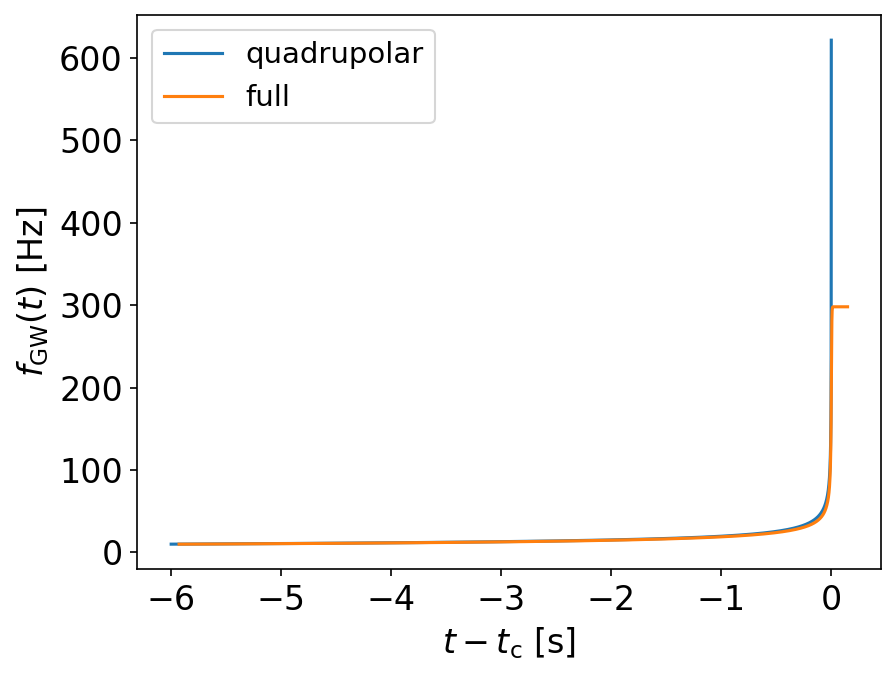

In [14]:
fig = plt.figure(dpi=150)
ax = plt.gca()
ts = np.linspace(1e-4, 6, 5000)
ax.plot(-ts[::-1], np.array([f_gw(_t, mchirp) for _t in ts])[::-1], label="quadrupolar")
ax.plot(hp.sample_times, f, label="full")
ax.set_xlabel(r"$t - t_{\rm c}$" + " [s]")
ax.set_ylabel(r"$f_{\rm GW}(t)$" + " [Hz]")
plt.legend()

Again, we see that the quadrupolar formula is only good for early inspiral, but not after the late inspiral stage.

#### Questions/Exercises:

1. Why does the quadrupolar one blow up near the merger? Is this physical?
2. Estimate the radiated energy from GW emission, using the information you have from this plot (Hint: Use Eq. 5.2.57). Express your answer in $M_{\odot}c^2$.

## Modeling the ringdown with QNMs

Now we switch gear and look at the waveform after the peak/the merger, which is the ringdown.

Here, we will try to compute what the QNM frequencies should be and see that they indeed show up in the waveform. In order to do so (using BHPT), we first need to know what the mass $M_{\rm f}$ and the spin (rotation parameter) $\chi_{\rm f}$ of the remnant BH are. Luckily, we have various fits from NR simulations at our disposal, without needing to run those expensive simulations ourselves!

In [15]:
# Estimate final mass and final spin
from lalinference.imrtgr.nrutils import bbh_final_mass_projected_spins, bbh_final_spin_projected_spins, bbh_Kerr_trunc_opts

# In particular, we use the UIB2016 fit
Mf = bbh_final_mass_projected_spins(mass1, mass2, 0, 0, 0, 0, 'UIB2016')
chif = bbh_final_spin_projected_spins(mass1, mass2, 0, 0, 0, 0, 'UIB2016', truncate=bbh_Kerr_trunc_opts.trunc)
Mf, chif

(57.09503657133952, 0.686369879389307)

In [16]:
(mass1 + mass2) - Mf # This much of mass, in solar mass, was being radiated away from the system by GW

2.90496342866048

Even though the two initial BHs are non-spinning, the remnant one is spinning (relatively) fast. It is inherited from the orbital angular momentum of the binary system because of the conservation of angular momentum. [Note that GW does carry (small amount of) angular momentum away from the binary.]

With this, we are ready to compute the QNM frequencies! To do that, we "only" need to solve for both the radial and the angular Teukolsky equation, subject to the QNM boundary conditions. Just like (non-relativistic) quantum mechanics, only a discrete set of values/frequencies can satisfy those conditions. However, these frequencies $\omega_{\rm QNM}$ are _complex_ instead.

If we write these complex frequencies as $\omega_{\rm QNM} = \omega_{\rm R} + i \omega_{\rm I}$, then the complex strain $h_{+} - ih_{\times}$ is given (of course, I have skipped many details on how to get from the radial Teukosky equation solution to this...) by

$$
h_{+} - ih_{\times} \propto e^{i \omega_{\rm R} t} e^{-|\omega_{\rm I}|t}
$$

which looks like a damped sinusoid (and hence the name _ringdown_).

In the interest of time, we will use a python package `qnm` to "do" the calculation (actually they have been precomputed).

In [17]:
import qnm

grav_220 = qnm.modes_cache(s=-2,l=2,m=2,n=0)
omega, A, C = grav_220(a=chif)
omega

(0.5266644905487461-0.0812915973692676j)

Note that this is in unit of $GM_{\rm f}/c^3$, and so a conversion is needed to bring it back to the SI unit.

Let us overlay the predicted QNM frequency on top of the plot that we had above

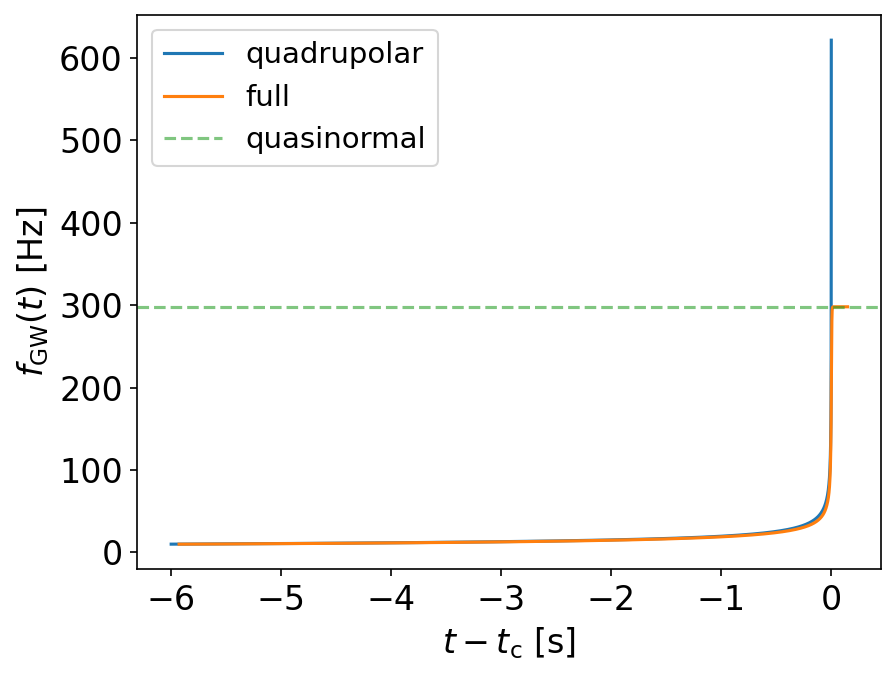

In [18]:
ax.axhline((np.real(omega)/(lal.MTSUN_SI*Mf))/(2*np.pi), ls="--", label="quasinormal", c="C2", alpha=0.6)
ax.legend()
fig

Unsurprisingly, the frequency of the complete IMR waveform in the ringdown we computed (after $t \geq t_{\rm c}$) matches with the (real part) QNM frequency!

However, to get the amplitude (recall that we only computed the oscillation frequency, given by the real part of the frequency, and the damping rate, given by the imaginary part, from BHPT), we need to rely again on NR simulations. Here, we use the `MMRDNP` fit introduced in [Phys. Rev. D 102, 084052 (2020)](https://arxiv.org/abs/1801.08208).

In [19]:
import pyRing.waveform

# Note that pyRing internally computes what the QNM frequency should be again,
# but from the plot above, you can see that what we computed is a good match
ringdown_wfm_model = pyRing.waveform.MMRDNP(
    20*(mass1+mass2)*lal.MTSUN_SI, 0,
    Mf, chif,
    mass1+mass2, eta,
    0, 0,
    distance,
    np.pi-inc, np.pi/2,
    {}
)

/Users/ricokaloklo/anaconda3/envs/igwn-py311/lib/python3.11/site-packages/pyRing/utils.py:65: UserWarning: * The `surfinBH` package is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.
  warnings.warn("* The `surfinBH` package is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.")


Compare our simple damped sinusoid model with the complete IMR waveform, and voilà

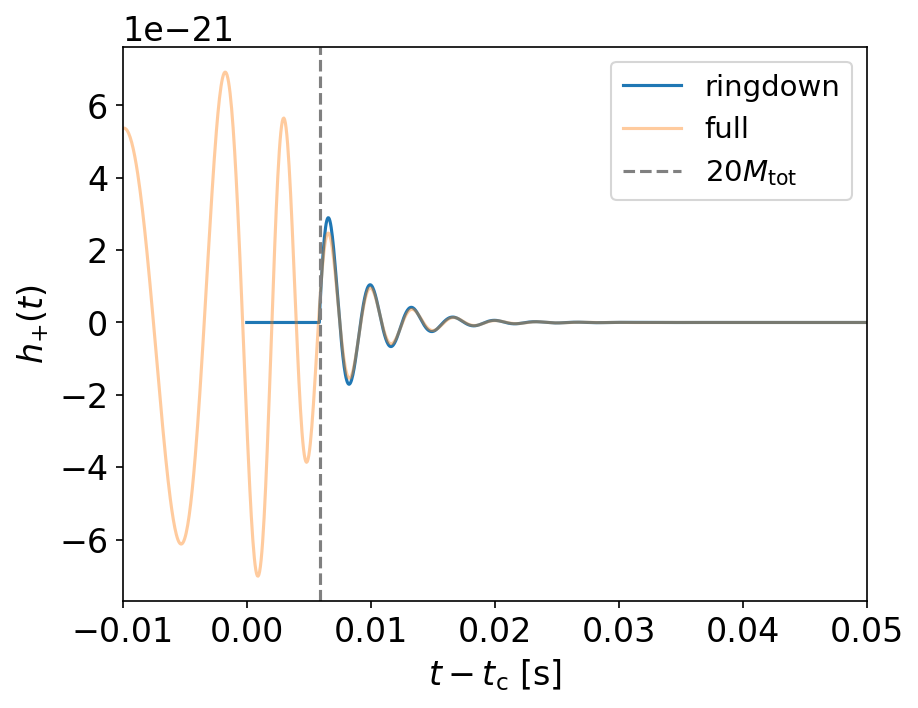

In [20]:
rd_ts = np.linspace(0, 0.05, 1000)
fig = plt.figure(dpi=150)
ax = fig.gca()
ax.plot(rd_ts, ringdown_wfm_model.waveform(rd_ts)[3], label="ringdown")
ax.plot(hp.sample_times, hp, label="full", alpha=0.4)
ax.set_xlabel(r"$t - t_{\rm c}$" + " [s]")
ax.set_ylabel(r"$h_{+}(t)$")
ax.set_xlim(-0.01, 0.05)
ax.axvline(20*(mass1+mass2)*lal.MTSUN_SI, ls="--", c="grey", label=r"$20M_{\rm tot}$")
plt.legend()

(Note that $M_{\rm tot} \equiv m_1 + m_2 \neq M_{\rm f}$ is the total initial mass)